# Content
    1.Import libraries
    2.Load dataset
    3.Check for missing values 
    4.Exploratory data analysis
    5.Check for outliers
    6.Data preparation
    7.XGBoost regression

# Import libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, RobustScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from xgboost import XGBRegressor


# Load dataset

In [2]:
vehicle_prices = pd.read_csv('Car details v3.csv')
vehicle_prices.shape

(8128, 13)

In [3]:
vehicle_prices.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [4]:
vehicle_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [5]:
vehicle_prices['name'] = vehicle_prices['name'].str.replace('( ).*', '')

vehicle_prices['mileage'] = vehicle_prices['mileage'].str.replace('( ).*', '')
vehicle_prices['mileage'] = vehicle_prices['mileage'].astype('float64')

vehicle_prices['engine'] = vehicle_prices['engine'].str.replace('( ).*', '')
vehicle_prices['engine'] = vehicle_prices['engine'].astype('float64')

vehicle_prices['max_power'] = vehicle_prices['max_power'].str.replace('( ).*', '')
vehicle_prices['max_power'] = pd.to_numeric(vehicle_prices['max_power'], errors = 'coerce')

vehicle_prices.drop('torque', axis='columns', inplace = True)

vehicle_prices.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0
1,Skoda,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,Honda,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5.0
3,Hyundai,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0
4,Maruti,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0


In [6]:
vehicle_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   float64
 9   engine         7907 non-null   float64
 10  max_power      7912 non-null   float64
 11  seats          7907 non-null   float64
dtypes: float64(4), int64(3), object(5)
memory usage: 762.1+ KB


In [7]:
vehicle_prices.describe()

,year,selling_price,km_driven,mileage,engine,max_power,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000,7907.000000,7912.000000,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,19.418783,1458.625016,91.517919,5.416719
std,4.044249,8.062534e+05,5.655055e+04,4.037145,503.916303,35.822499,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,0.000000,624.000000,0.000000,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,16.780000,1197.000000,68.050000,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,19.300000,1248.000000,82.000000,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,22.320000,1582.000000,102.000000,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,42.000000,3604.000000,400.000000,14.000000


In [8]:
vehicle_prices.describe(include = 'object')

,name,fuel,seller_type,transmission,owner
count,8128,8128,8128,8128,8128
unique,32,4,3,2,5
top,Maruti,Diesel,Individual,Manual,First Owner
freq,2448,4402,6766,7078,5289


# Check for missing values 

In [9]:
vehicle_prices.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        216
seats            221
dtype: int64

We have missing values in 'mileage', 'engine', 'max_power' and 'seats' features    

# Exploratory data analysis

Text(0.5, 1, 'Correlations between numeric variables')

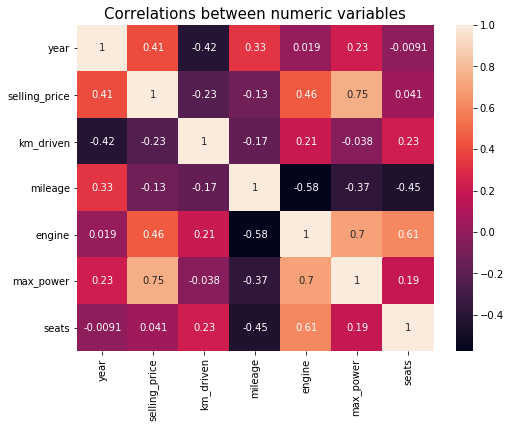

In [10]:
plt.figure(figsize = (8, 6))
sns.heatmap(vehicle_prices.corr(), annot = True)
plt.title('Correlations between numeric variables', fontsize = 15)

Vehicle price has the highest correlation with max_power. 

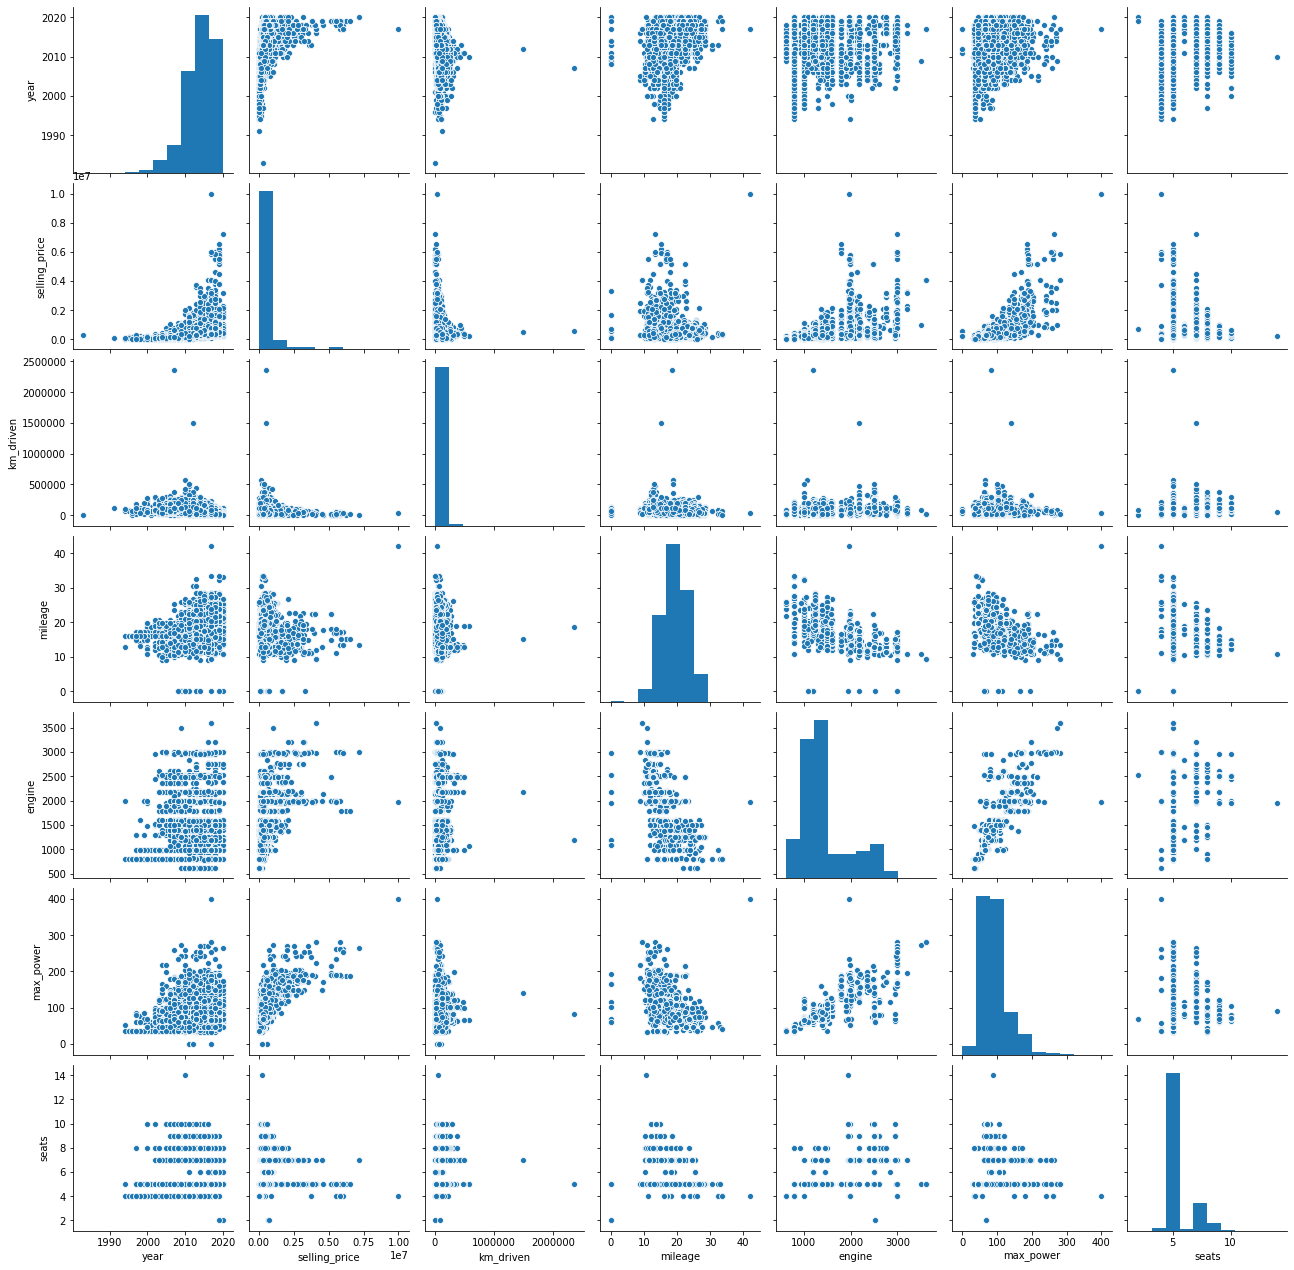

In [11]:
sns.pairplot(vehicle_prices)

In [12]:
vehicle_prices.groupby(['transmission'])['selling_price'].mean()

transmission
Automatic    1.870828e+06
Manual       4.554259e+05
Name: selling_price, dtype: float64

The mean price of vehicle with automatic transmission is higher than the manual transmission

In [13]:
vehicle_prices.groupby(['fuel'])['selling_price'].mean().sort_values(ascending = False)

fuel
Diesel    791452.921627
Petrol    462441.061691
CNG       301017.491228
LPG       200421.052632
Name: selling_price, dtype: float64

The mean price of vehicle with diesel fuel is the highest

In [14]:
vehicle_prices.groupby(['seller_type'])['selling_price'].mean().sort_values(ascending = False)

seller_type
Dealer              1.443494e+06
Trustmark Dealer    8.018390e+05
Individual          4.985612e+05
Name: selling_price, dtype: float64

In [15]:
vehicle_prices.groupby(['owner'])['selling_price'].mean().sort_values(ascending = False)

owner
Test Drive Car          4.403800e+06
First Owner             7.830864e+05
Second Owner            3.929645e+05
Third Owner             2.840153e+05
Fourth & Above Owner    2.258132e+05
Name: selling_price, dtype: float64

The mean price is the highest for test drive cars

# Check for outliers

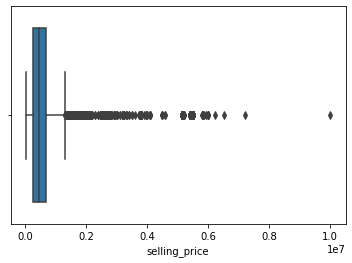

In [16]:
sns.boxplot(vehicle_prices['selling_price'])

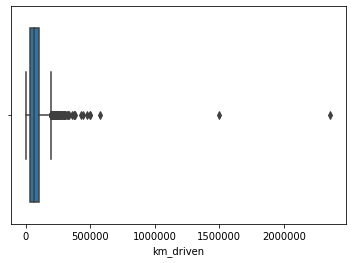

In [17]:
sns.boxplot(vehicle_prices['km_driven'])

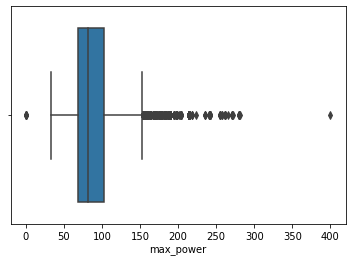

In [18]:
sns.boxplot(vehicle_prices['max_power'])

From these boxplots we have some outliers

# Data preparation

In [19]:
X = vehicle_prices.drop('selling_price', axis = True)
y = vehicle_prices['selling_price']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.3, random_state = 0)

In [21]:
cat_columns = [cname for cname in X_train.columns 
               if X_train[cname].dtype == 'object' and X_train[cname].nunique() < 10]
numeric_columns = [cname for cname in X_train.columns 
                   if X_train[cname].dtype in ['int64', 'float64']]

In [22]:
categorical_transformer = OneHotEncoder(handle_unknown = 'ignore', sparse = False)
numeric_transformer = Pipeline(steps = [
    ('imputer', SimpleImputer(strategy = 'mean')),
    ('scaler', RobustScaler())
])

preprocessor = ColumnTransformer(
    transformers = [
        ('num', numeric_transformer, numeric_columns),
        ('cat', categorical_transformer, cat_columns)
])

# XGBoost regression

In [23]:
def print_scores(pred, test, shape):
    mse = mean_squared_error(y_pred = pred, y_true = test)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_pred = pred, y_true = test)
    R2 = r2_score(y_pred = pred, y_true = test)
    Adj_r2 = 1 - (1 - R2) * (shape[0] - 1) / (shape[0] - shape[1] - 1)
    
    print('rmse: ', rmse)
    print('mae: ', mae)
    print('R2: ', R2)
    print('R2_adjusted: ', Adj_r2)

In [24]:
my_pipeline = Pipeline(steps = [('preprocessor', preprocessor), 
                                ('model', XGBRegressor(n_estimators = 1000, 
                                                       learning_rate = 0.1, 
                                                       max_depth = 3))
])

In [25]:
my_pipeline.fit(X_train, y_train)
preds_train = my_pipeline.predict(X_train)
print_scores(preds_train, y_train, X_train.shape)

rmse:  75812.78441997907
mae:  51623.44695492397
R2:  0.9910456537507306
R2_adjusted:  0.9910283034233144


In [26]:
preds_test = my_pipeline.predict(X_test)
print_scores(preds_test, y_test, X_test.shape)

rmse:  174463.01906102936
mae:  71845.34576478577
R2:  0.9544844536262858
R2_adjusted:  0.9542781614919179
